<a href="https://colab.research.google.com/github/nguyetvo/CBD-Melbourne-Housing-Predict/blob/master/Melbourne_Housing_Predict_Update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from pandas import read_csv, DataFrame

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data =  pd.read_csv('/content/drive/My Drive/Melbourne Housing Predict/Melbourne_housing_FULL.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [0]:
#change Postcode
data['Postcode']= data['Postcode'].astype('object')
#change Bathroom and car to integer. Before the transformation I need to convert all the missing values to 0. 
#lastly, change Propertycount to category
data['Propertycount']= data['Propertycount'].astype('object')

In [0]:
#replace outlier building area
data['BuildingArea'].replace(44515.0, 445, inplace=True)

In [7]:
# check YearBuilt > 2018
print(data['YearBuilt'].loc[data.YearBuilt>2018])
#replace 2106 with 2016 and 2019 with 2018
data['YearBuilt'].replace([2106, 2019], [2016, 2018], inplace=True)

2453     2106.0
33033    2019.0
Name: YearBuilt, dtype: float64


In [0]:
# We will save the "cured" data columns in variables
#first with the mean
priceWithMean = data['Price'].fillna(data['Price'].mean())
BAWithMean = data['BuildingArea'].fillna(data['BuildingArea'].mean())

#now with the median
priceMedian = data['Price'].fillna(data['Price'].median())
BAMedian = data['BuildingArea'].fillna(data['BuildingArea'].median())

In [9]:
data['Price']= data['Price'].fillna(data['Price'].median())
data['Landsize']= data['Landsize'].fillna(data['Landsize'].median())
#Similarly, fill the only missing value of  all the other numeric values
data['Distance'] = data['Distance'].fillna(data['Distance'].median())
data['BuildingArea']= data['BuildingArea'].fillna(data['BuildingArea'].median())
data['Lattitude']= data['Lattitude'].fillna(data['Lattitude'].median())
data['Longtitude']= data['Longtitude'].fillna(data['Longtitude'].median())
data['YearBuilt']= data['YearBuilt'].fillna(data['YearBuilt'].median())
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            1
Bedroom2         8217
Bathroom         8226
Car              8728
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         3
Lattitude           0
Longtitude          0
Regionname          3
Propertycount       3
dtype: int64

In [10]:
data['Bathroom']= data['Bathroom'].fillna(data['Bathroom'].mode()[0])
data['Bedroom2']= data['Bedroom2'].fillna(data['Bedroom2'].mode()[0])
data['Car']= data['Car'].fillna(data['Car'].mode()[0])
data['CouncilArea']= data['CouncilArea'].fillna(data['CouncilArea'].mode()[0])
data['Regionname']= data['Regionname'].fillna(data['Regionname'].mode()[0])
data['Propertycount']= data['Propertycount'].fillna(data['Propertycount'].mode()[0])
data['Postcode']= data['Postcode'].fillna(data['Postcode'].mode()[0])
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

# **Hypothesis Testing**

**Testing Correlation between landsize and Price of houses**
- Null Hypothesis: **There is no significant difference between landsize and Price of houses i.e. there is no correlation between the two variable.**
- Alternative Hypothesis: **There is a significant difference between landsize and price and they are correlated.**

Using the Pearson’s Correlation test:

In [0]:
!pip install --upgrade pingouin
import pingouin as pg 
from scipy import stats 
import scipy 

In [12]:
pg.corr(x=data['Price'], y=data['Landsize'])
#r,p = scipy.stats.pearsonr(data.Price, data.Landsize)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,34857,0.027,"[0.02, 0.04]",0.001,0.001,3.419611e-07,2963.672,0.999


I have a significant p-value here (3.419611e-07 << 0.05) and thus I reject the null hypothesis. I conclude there is indeed a correlation between Landsize and Price.

**Testing Correlation between no. of rooms and Price of houses**
- Null Hypothesis: **There is no significant difference between No. of rooms and Price of houses i.e. there is no correlation between the two variable.**
- Alternative Hypothesis: **There is a significant difference between No. of rooms and price and they are correlated.**

Using the Pearson’s Correlation test:

In [13]:
pg.corr(x=data['Price'], y=data['Rooms'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,34857,0.392,"[0.38, 0.4]",0.153,0.153,0.0,inf,1.0


Here again I have a significant p-value here (0.0 << 0.05) and thus I reject the null hypothesis. I conclude there is indeed a correlation between No. of rooms and price.

**Testing Correlation between Distance from CBD and Price of houses**
- Null Hypothesis: **There is no significant difference between Distance from CBD and Price of houses i.e. there is no correlation between the two variable.**
-  Alternative Hypothesis: **There is a significant difference between Distance from CBD and price and they are correlated.**

Using the Pearson’s Correlation test:

In [14]:
pg.corr(x=data['Price'], y=data['Distance'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,34857,-0.182,"[-0.19, -0.17]",0.033,0.033,9.858216e-257,1.547e+252,1.0


I have a significant p-value here (9.858216e-257 << 0.05) and thus I reject the null hypothesis. I conclude there is indeed a correlation between distance from CBD and price.

In [0]:
target = "Price"
features = [d for d in data.columns if (d != target) & (len(data[d].unique()) > 1)]
data = data[data[target].notnull()]

def get_dtype_lists(data,features):
    output = {}
    for f in features:
        dtype = str(data[f].dtype)
        if dtype not in output.keys(): output[dtype] = [f]
        else: output[dtype] += [f]
    return output

def show_uniques(data,features):
    for f in features:
        if len(data[f].unique()) < 30:
            print("%s: %s" % (f,data[f].unique()))
        else:
            print("%s: count(%s) %s" % (f,len(data[f].unique()),data[f].unique()[0:10]))

def show_all_uniques(data,features):
    dtypes = get_dtype_lists(data,features)
    for key in dtypes.keys():
        print(key + "\n")
        show_uniques(data,dtypes[key])
        print()

dtype_lists = get_dtype_lists(data,features)

to_be_transformed = ["Date", "Address", "YearBuilt"]
categories = [c for c in dtype_lists["object"] if c not in to_be_transformed]
categories += ["Postcode"]
counts = ["Rooms", "Bedroom2", "Bathroom", "Car"]
numerics = [i for i in dtype_lists["float64"] if i not in categories + to_be_transformed]

dtype_lists = get_dtype_lists(data,features)

to_be_transformed = ["Date", "Address", "YearBuilt"]
categories = [c for c in dtype_lists["object"] if c not in to_be_transformed]
categories += ["Postcode"]
counts = ["Rooms", "Bedroom2", "Bathroom", "Car"]
numerics = [i for i in dtype_lists["float64"] if i not in categories + to_be_transformed]

In [16]:
from scipy.stats import chisquare

temp = {}

for c in features:
    unit = data.groupby(c).count()["Price"]
    temp[c] = chisquare(unit)
    
chisquare_dataframe = DataFrame(data=temp, index=["chi-square test statistic", "p-value"])
chisquare_dataframe.round(2).T

,chi-square test statistic,p-value
Suburb,51167.95,0.0
Address,898.45,1.0
Rooms,90969.63,0.0
Type,20320.12,0.0
Method,81558.80,0.0
SellerG,597180.82,0.0
Date,10631.11,0.0
Distance,40861.15,0.0
Postcode,33948.95,0.0
Bedroom2,171959.23,0.0


In [0]:
#A Table of p-values from Chi-square Two Way Tests
p_value_table = DataFrame(index = features, columns = features)

from scipy.stats import chi2_contingency
from pandas import crosstab

def is_statistically_significant(p):
        
    if p < 0.05:
        return 1
    else:
        return 0

duplicate = []
for c in features:
    
    duplicate.append(c)
    
    for cc in features:
        if not c == cc: # and cc not in duplicate:
            crosstable = crosstab(data[c], data[cc])
            chi2, p, dof, expected = chi2_contingency(crosstable)
            p_value_table[c][cc] = is_statistically_significant(p)

In [18]:
p_value_table
#1 means statistically significant (p < 0.05)
#0 means non-significant (p >= 0.05)

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Suburb,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Address,1,NaN,0,1,0,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1
Rooms,1,0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Type,1,1,1,NaN,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1
Method,1,0,1,1,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
SellerG,1,0,1,1,1,NaN,1,1,1,1,1,1,1,1,0,1,1,1,1,1
Date,1,0,1,1,1,1,NaN,1,1,1,1,1,1,0,1,1,0,0,1,1
Distance,1,1,1,1,1,1,1,NaN,1,1,1,1,1,1,1,1,1,1,1,1
Postcode,1,1,1,1,1,1,1,1,NaN,1,1,1,1,1,1,1,1,1,1,1
Bedroom2,1,1,1,1,1,1,1,1,1,NaN,1,1,1,1,1,1,1,1,1,1


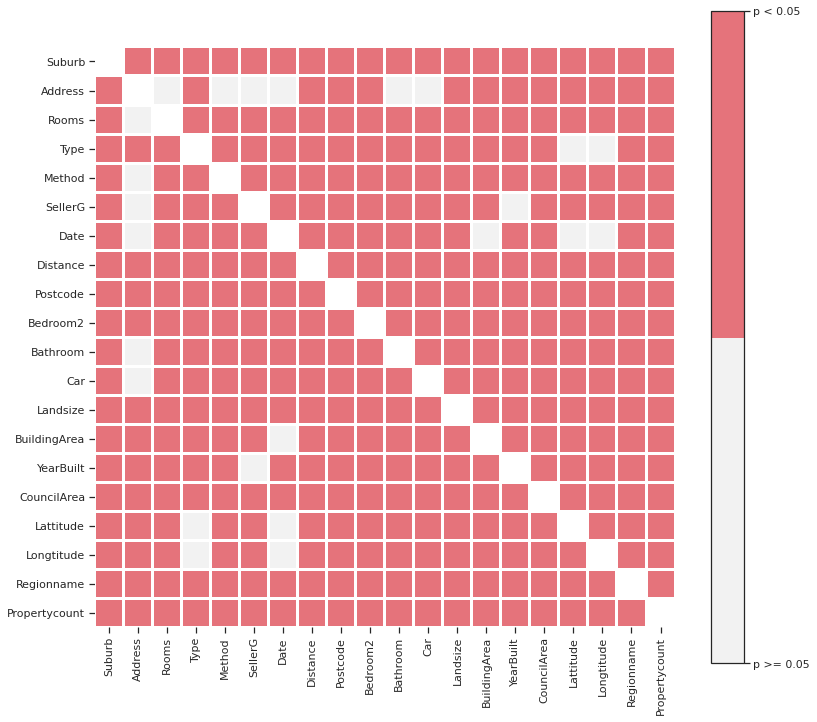

In [19]:
#Heatmap of Statistically Significant vs Non-significant Categorical x Categorical Relationships
from seaborn import heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from numpy import float32

plt.figure(figsize=(13,12))

p = sns.diverging_palette(10, 220, sep=80, n=10)
myColors = [p[4], p[1]]
cmap = colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

ax = heatmap(p_value_table.fillna(float32(None)), linewidths=2, cmap=cmap, cbar=False, square=True)
cbar = ax.figure.colorbar(ax.collections[0])
cbar.set_ticks([1, 0])
cbar.set_ticklabels(["p < 0.05", "p >= 0.05"])
plt.show()

In [20]:
#Number of categorical x categorical relationships that are statistically significant vs non-significant
p_value_data = {}

for c in features:
    
    p_value_data[c] = {}
    row = p_value_data[c]
    
    column_value_counter = p_value_table[c].value_counts()
    relationships_counter = len(features) - 1
    significant = 0
    nonsignificant = 0
    
    if not column_value_counter.empty:
        
        if 1 in column_value_counter.keys():
            
            significant += column_value_counter[1]
            
        if 0 in column_value_counter.keys():
            
            nonsignificant += column_value_counter[0]
        
        row["p < 0.05"] = significant
        row["p >= 0.05"] = nonsignificant
        row["Percentage of Relationships Significant"] = ("%.1f" % ((significant / relationships_counter) * 100)) + "%"
        
DataFrame(data = p_value_data).T.sort_values("p < 0.05", ascending=False)

,p < 0.05,p >= 0.05,Percentage of Relationships Significant
Suburb,19,0,100.0%
Distance,19,0,100.0%
Regionname,19,0,100.0%
CouncilArea,19,0,100.0%
Landsize,19,0,100.0%
Bedroom2,19,0,100.0%
Postcode,19,0,100.0%
Propertycount,19,0,100.0%
Car,18,1,94.7%
Method,18,1,94.7%


In [21]:
data['Method'].value_counts()

S     19744
SP     5095
PI     4850
VB     3108
SN     1317
PN      308
SA      226
W       173
SS       36
Name: Method, dtype: int64

In [22]:
#Is there a significant effect of different categories in Method on Price?

data.groupby(['Method'])['Price'].mean()

Method
PI    1.036363e+06
PN    8.700000e+05
S     1.030974e+06
SA    9.645836e+05
SN    8.700000e+05
SP    8.763803e+05
SS    8.700000e+05
VB    1.149977e+06
W     8.700000e+05
Name: Price, dtype: float64

Text(8.959999999999994, 0.5, 'Mean Price')

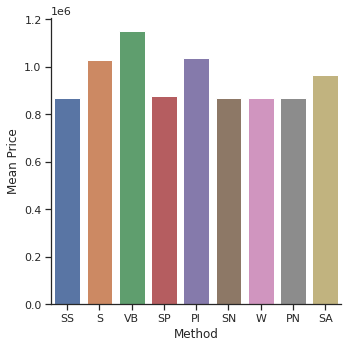

In [23]:
sns.catplot(data=data, x="Method", y="Price", kind="bar", ci=None)
plt.ylabel("Mean Price")

Above visualization depects that there is a little difference in mean price for different catagories of Method. Need to do hypothesis testing to make sure that this holds true in population

**ANOVA: Tukey's Honestly Singnificant Difference test**

In [24]:
import statsmodels.stats.multicomp as multi

mc1 = multi.MultiComparison(data["Price"],data["Method"])
res1 = mc1.tukeyhsd()
print(res1.summary())

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
    PI     PN -166363.3812  0.001 -269716.6461  -63010.1164   True
    PI      S   -5389.4012    0.9  -33576.8586   22798.0561  False
    PI     SA   -71779.806 0.6219 -191471.9032   47912.2912  False
    PI     SN -166363.3812  0.001 -221014.9932 -111711.7693   True
    PI     SP -159983.0904  0.001 -195268.0146 -124698.1662   True
    PI     SS -166363.3812 0.6864 -460591.6324  127864.8699  False
    PI     VB   113613.131  0.001   73200.1998  154026.0622   True
    PI      W -166363.3812 0.0047 -302450.6277  -30276.1347   True
    PN      S    160973.98  0.001   59975.3048  261972.6552   True
    PN     SA   94583.5752  0.595  -59469.6551  248636.8055  False
    PN     SN          0.0    0.9 -111323.8444  111323.8444  False
    PN     SP    6380.2909    0.9  -96824.4838  109585.0656  F

Most of the pair wise ANOVA tests show that there is a significance "Price" difference for different catagories of "Method".

In [25]:
mc2 = multi.MultiComparison(data["Price"],data["Regionname"])
res2 = mc2.tukeyhsd()
print(res2.summary())

                           Multiple Comparison of Means - Tukey HSD, FWER=0.05                            
          group1                     group2             meandiff   p-adj     lower        upper     reject
----------------------------------------------------------------------------------------------------------
      Eastern Metropolitan           Eastern Victoria -291795.9339  0.001 -403333.3484 -180258.5194   True
      Eastern Metropolitan      Northern Metropolitan -185463.3147  0.001 -215430.7992 -155495.8302   True
      Eastern Metropolitan          Northern Victoria -383665.3023  0.001 -501550.1262 -265780.4783   True
      Eastern Metropolitan South-Eastern Metropolitan -172531.5758  0.001 -219074.8709 -125988.2807   True
      Eastern Metropolitan      Southern Metropolitan  200170.1339  0.001  171124.0534  229216.2144   True
      Eastern Metropolitan       Western Metropolitan -206153.6779  0.001 -237973.2148  -174334.141   True
      Eastern Metropolitan           

This in turn meant that I could state that there is a statistically significant difference between house prices of Melbourne’s metropolitan regions.

In [0]:
data.drop(columns=['Lattitude','Longtitude'], inplace=True)

In [0]:
data.drop(columns='YearBuilt', inplace=True)

In [0]:
data = data[pd.notnull(data['BuildingArea'])]

In [0]:
import copy
data_regr = copy.copy(data[pd.notnull(data['Price'])])

In [0]:
data.drop(columns='Bedroom2', inplace=True)

In [0]:
data_regr.drop(columns='Bedroom2', inplace=True)

In [32]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,870000.0,SS,Jellis,3/09/2016,2.5,3067.0,1.0,1.0,126.0,136.0,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,1.0,1.0,202.0,136.0,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,870000.0,VB,Rounds,4/02/2016,2.5,3067.0,2.0,1.0,0.0,136.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,Yarra City Council,Northern Metropolitan,4019.0


# Regression

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error


In [0]:
data_regr.drop(columns=['Suburb','Postcode'], inplace=True)

In [0]:
import datetime
def to_year(date_str):
    return datetime.datetime.strptime(date_str.strip(),'%d/%m/%Y').year

In [0]:
data_regr['Date'] = data_regr.Date.apply(to_year)

In [37]:
data_regr.Date.value_counts()

2017    19852
2016    10292
2018     4713
Name: Date, dtype: int64

In [0]:
import re
def to_street(str):
    return re.sub('[^A-Za-z]+', '', str)

In [39]:
data_regr.Address.apply(to_street).value_counts().count()

12164

It still has up to 12164 unique value. For regression, this column is too diversed. Hence, I drop it.

In [0]:
data_regr.drop(columns='Address', inplace=True)

In [41]:
counts = data_regr.SellerG.value_counts()
counts

Jellis           3359
Nelson           3236
Barry            3235
hockingstuart    2623
Marshall         2027
                 ... 
A                   1
CASTRAN             1
Karen               1
Burns               1
Free                1
Name: SellerG, Length: 388, dtype: int64

In [42]:
data_regr.SellerG[data['SellerG'].isin(counts[counts < 100].index)] = 'less than 100'
data_regr.SellerG[data['SellerG'].isin(counts[(counts >= 100) & (counts < 200)].index)] = '100 - 200'
data_regr.SellerG[data['SellerG'].isin(counts[(counts >= 200) & (counts < 500)].index)] = '200 - 500'
data_regr.SellerG[data['SellerG'].isin(counts[(counts >= 500) & (counts < 1000)].index)] = '500 - 1000'
data_regr.SellerG[data['SellerG'].isin(counts[counts > 1000].index)] = 'over 1000'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [43]:
data_regr.SellerG.value_counts()

over 1000        18298
200 - 500         5694
500 - 1000        5334
less than 100     3575
100 - 200         1956
Name: SellerG, dtype: int64

As we already have the Geo information of the house in the Regionname , the CouncilArea with 33 unique values can be dropped for convenience.

In [0]:
data_regr.drop(columns='CouncilArea', inplace=True)

In [45]:
data_regr.describe(include=['O']).T

,count,unique,top,freq
Type,34857,3,h,23980
Method,34857,9,S,19744
SellerG,34857,5,over 1000,18298
Regionname,34857,8,Southern Metropolitan,11839


In [46]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,870000.0,SS,Jellis,3/09/2016,2.5,3067.0,1.0,1.0,126.0,136.0,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,1.0,1.0,202.0,136.0,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,870000.0,VB,Rounds,4/02/2016,2.5,3067.0,2.0,1.0,0.0,136.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,Yarra City Council,Northern Metropolitan,4019.0


In [0]:
data = data.reset_index().drop(columns='index') # do not use inplace=True if combine
data_regr = data_regr.reset_index().drop(columns='index')

In [48]:
data_regr.head()

,Rooms,Type,Price,Method,SellerG,Date,Distance,Bathroom,Car,Landsize,BuildingArea,Regionname,Propertycount
0,2,h,870000.0,SS,over 1000,2016,2.5,1.0,1.0,126.0,136.0,Northern Metropolitan,4019.0
1,2,h,1480000.0,S,500 - 1000,2016,2.5,1.0,1.0,202.0,136.0,Northern Metropolitan,4019.0
2,2,h,1035000.0,S,500 - 1000,2016,2.5,1.0,0.0,156.0,79.0,Northern Metropolitan,4019.0
3,3,u,870000.0,VB,less than 100,2016,2.5,2.0,1.0,0.0,136.0,Northern Metropolitan,4019.0
4,3,h,1465000.0,SP,500 - 1000,2017,2.5,2.0,0.0,134.0,150.0,Northern Metropolitan,4019.0


**One-hot Encode**

In [0]:
categoricals = ['Type', 'Method', 'SellerG', 'Regionname', 'Date']
for feature in categoricals:
    df = copy.copy(pd.get_dummies(data_regr[feature], drop_first=True))
    data_regr = pd.concat([data_regr, df], axis=1)
    data_regr.drop(columns=feature, inplace=True)

In [50]:
data_regr.head()

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Propertycount,t,u,PN,S,SA,SN,SP,SS,VB,W,200 - 500,500 - 1000,less than 100,over 1000,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria,2017,2018
0,2,870000.0,2.5,1.0,1.0,126.0,136.0,4019.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,2,1480000.0,2.5,1.0,1.0,202.0,136.0,4019.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,2,1035000.0,2.5,1.0,0.0,156.0,79.0,4019.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,3,870000.0,2.5,2.0,1.0,0.0,136.0,4019.0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,3,1465000.0,2.5,2.0,0.0,134.0,150.0,4019.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [51]:
data_regr.shape

(34857, 31)

**Linear Regression without PCA**

**Hold out**

In [0]:
model_HO = linear_model.LinearRegression()

In [0]:
train, test = train_test_split(data_regr, test_size = 0.2, random_state=512)

In [54]:
train.shape

(27885, 31)

In [55]:
test.shape

(6972, 31)

In [0]:
X_train = train.loc[:, data_regr.columns != 'Price']
y_train = train.Price

X_test = test.loc[:, data_regr.columns != 'Price']
y_test = test.Price

In [57]:
model_HO.fit(X_train.values, y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
predict_train = model_HO.predict(X_train.values)
mean_squared_error(y_train, predict_train)

200347629794.25537

In [59]:
predict_test = model_HO.predict(X_test.values)
mean_squared_error(y_test, predict_test)

190703399245.9947

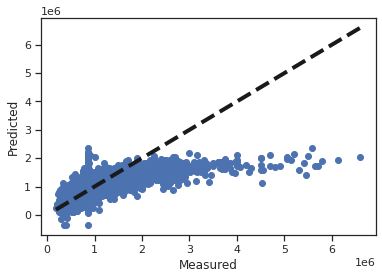

In [60]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_test, predict_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

**Cross validation**

In [0]:
model_CV = linear_model.LinearRegression()

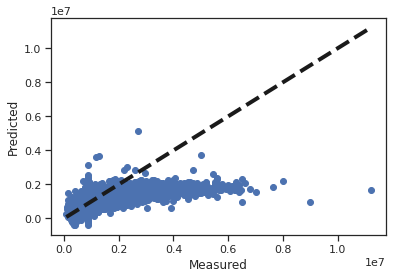

In [62]:
y = data_regr.Price
X = data_regr.loc[:, data_regr.columns != 'Price']
predicted = cross_val_predict(model_CV, X.values, y.values, cv=5)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [63]:
mean_squared_error(y.values, predicted)

200685272043.68445

According to the graph and the high value, this model does not perform well. It is possible that the model is too simple for this problem.

**Linear Regression with PCA**

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=10)

In [0]:
X_new = pd.DataFrame(pca.fit_transform(X.values))

**Hold out**

In [0]:
model_HO_PCA = linear_model.LinearRegression()

In [0]:
dataPCA = pd.concat([X_new, y], axis=1)

In [0]:
train, test = train_test_split(dataPCA, test_size = 0.2, random_state=512)

In [0]:
X_train = train.loc[:, train.columns != 'Price']
y_train = train.Price

X_test = test.loc[:, test.columns != 'Price']
y_test = test.Price

In [71]:
model_HO_PCA.fit(X_train.values, y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
predict_train = model_HO_PCA.predict(X_train.values)
mean_squared_error(y_train, predict_train)

224356813635.55753

In [73]:
predict_test = model_HO_PCA.predict(X_test.values)
mean_squared_error(y_test, predict_test)

212964300028.7197

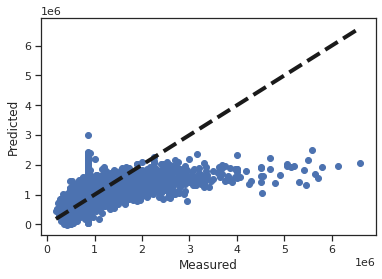

In [74]:
fig, ax = plt.subplots()
ax.scatter(y_test, predict_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

**Cross validation**

In [0]:
model_CV_PCA = linear_model.LinearRegression()

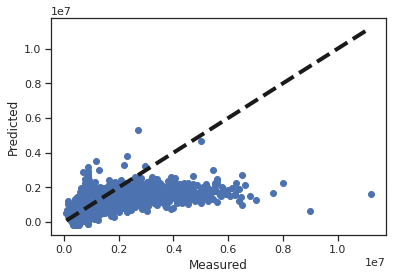

In [76]:
y = dataPCA.Price
X = dataPCA.loc[:, dataPCA.columns != 'Price']
predicted = cross_val_predict(model_CV_PCA, X.values, y.values, cv=5)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [77]:
mean_squared_error(y.values, predicted)

224056356233.2243

As expected, the original model with all of the data does not perform as very well, the model with PCA couldnt perform better.

In [0]:
X = data_regr.loc[:, data_regr.columns != 'Price']
y = data_regr.Price

In [0]:
model = linear_model.LinearRegression()

In [80]:
model.fit(X.values, y.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predict = model.predict(X.values)

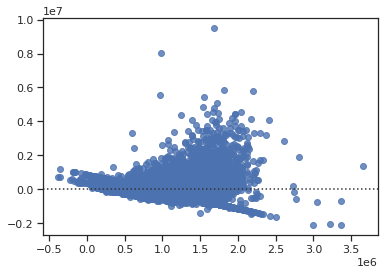

In [82]:
!pip install seaborn
import seaborn as sns

sns.residplot(predict, y.values)

the Residual Plot shows that this model is not a good fit for the problem.

In [0]:
a = (y.values - predict)

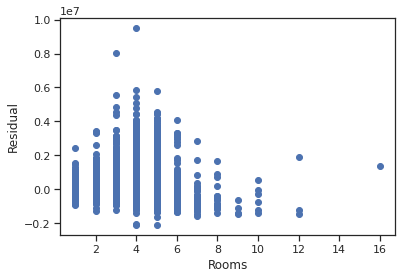

In [84]:
fig, ax = plt.subplots()
ax.scatter(data_regr.Rooms.values, a)
ax.set_xlabel('Rooms')
ax.set_ylabel('Residual')
plt.show()

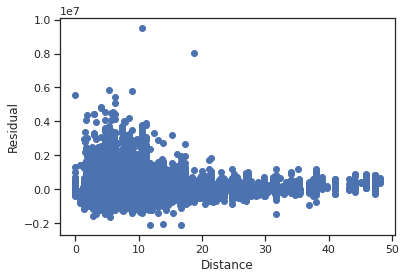

In [85]:
fig, ax = plt.subplots()
ax.scatter(data_regr.Distance.values, a)
ax.set_xlabel('Distance')
ax.set_ylabel('Residual')
plt.show()

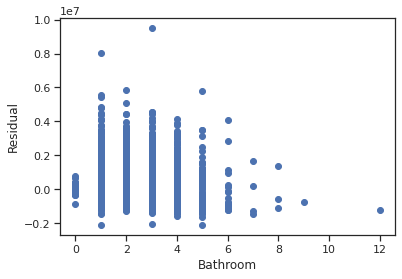

In [86]:
fig, ax = plt.subplots()
ax.scatter(data_regr.Bathroom.values, a)
ax.set_xlabel('Bathroom')
ax.set_ylabel('Residual')
plt.show()

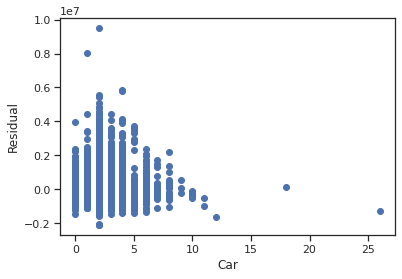

In [87]:
fig, ax = plt.subplots()
ax.scatter(data_regr.Car.values, a)
ax.set_xlabel('Car')
ax.set_ylabel('Residual')
plt.show()

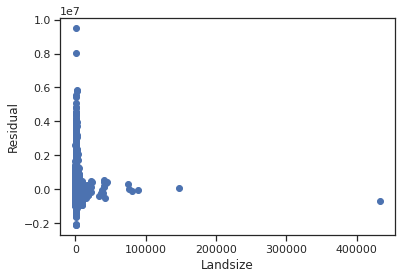

In [88]:
fig, ax = plt.subplots()
ax.scatter(data_regr.Landsize.values, a)
ax.set_xlabel('Landsize')
ax.set_ylabel('Residual')
plt.show()

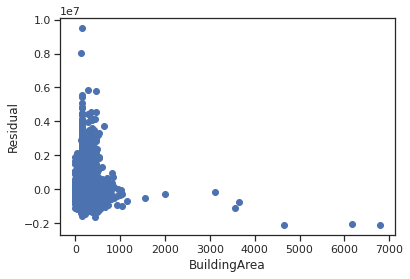

In [89]:
fig, ax = plt.subplots()
ax.scatter(data_regr.BuildingArea.values, a)
ax.set_xlabel('BuildingArea')
ax.set_ylabel('Residual')
plt.show()

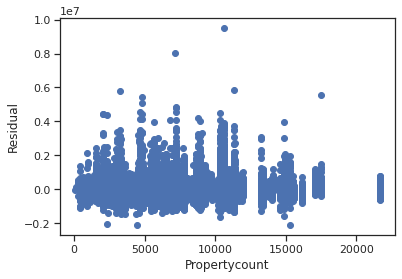

In [90]:
fig, ax = plt.subplots()
ax.scatter(data_regr.Propertycount.values, a)
ax.set_xlabel('Propertycount')
ax.set_ylabel('Residual')
plt.show()

It shows that the variables have great heteroskedasticity value, especially the BuildingArea and the Landsize. They have many outliers. I want to eliminate all of these outliers and fit the model again to see the result.

In [0]:
data_regr = data_regr[data_regr.BuildingArea < 3000]

In [0]:
data_regr = data_regr.reset_index()

In [0]:
data_regr.drop(columns='index', inplace=True)

In [94]:
data_regr.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34851.0,3.030874e+00,0.969858,1.0,2.0,3.0,4.0,16.0
Price,34851.0,1.010790e+06,571980.710175,85000.0,695000.0,870000.0,1150000.0,11200000.0
Distance,34851.0,1.118420e+01,6.787633,0.0,6.4,10.3,14.0,48.1
Bathroom,34851.0,1.477146e+00,0.686048,0.0,1.0,1.0,2.0,12.0
Car,34851.0,1.796620e+00,0.882745,0.0,1.0,2.0,2.0,26.0
Landsize,34851.0,5.688360e+02,2764.071727,0.0,357.0,521.0,598.0,433014.0
BuildingArea,34851.0,1.435219e+02,57.495397,0.0,136.0,136.0,136.0,2002.0
Propertycount,34851.0,7.574116e+03,4429.881276,83.0,4385.0,6763.0,10412.0,21650.0
t,34851.0,1.026656e-01,0.303526,0.0,0.0,0.0,0.0,1.0
u,34851.0,2.093771e-01,0.406870,0.0,0.0,0.0,0.0,1.0


In [0]:
data_regr = data_regr[data_regr.Landsize < 3000]
data_regr = data_regr.reset_index()
data_regr.drop(columns='index', inplace=True)

In [96]:
X = data_regr.loc[:, data_regr.columns != 'Price']
y = data_regr.Price
model = linear_model.LinearRegression()
model.fit(X.values, y.values)
predict = model.predict(X.values)
mean_squared_error(y.values, predict)

196331390570.44806

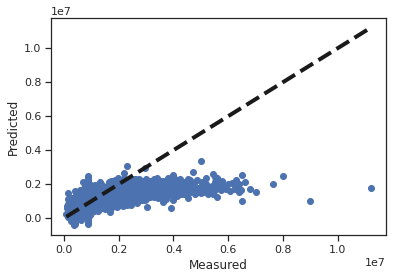

In [97]:
fig, ax = plt.subplots()
ax.scatter(y, predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

The model still does not perform really good. We might need a non-linear model for this problem.